## Generador de problemas

En el bloque de código siguiente, puedes modificar el tipo de epistasia para observar las proporciones resultantes de un cruce entre dos individuos doblemente heterocigotos para dos loci. Las opciones válidas para la variable `Epistasia` son: 'dihybrid' (sin epistasia), 'simple.recessive', 'simple.dominant', 'double.recessive', 'double.dominant' y 'double.dominant.recessive'.

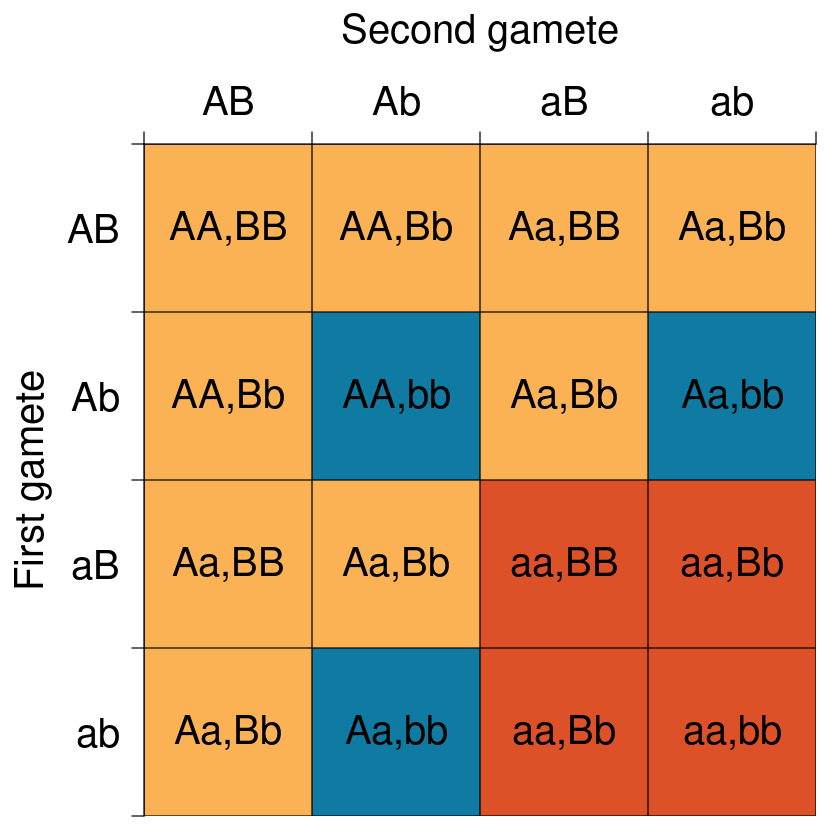

In [1]:
source('../scripts/mendel.R')
macho  <- diploid(list(c('A','a'), c('B', 'b')))
hembra <- diploid(list(c('A','a'), c('B', 'b')))
cruce  <- macho * hembra
Epistasia <- 'simple.recessive'
punnet(cruce, map = Epistasia)

Cada vez que ejecutes el código siguiente encontrarás un resultado diferente de número de indivíduos descendientes de un cruce dihíbrido de cada uno de los fenotipos posibles. El código escoge al azar un tipo de epistasia. Puedes modificar el número de descendientes, `N`. 

Descendientes
  0   3 
 37 463 

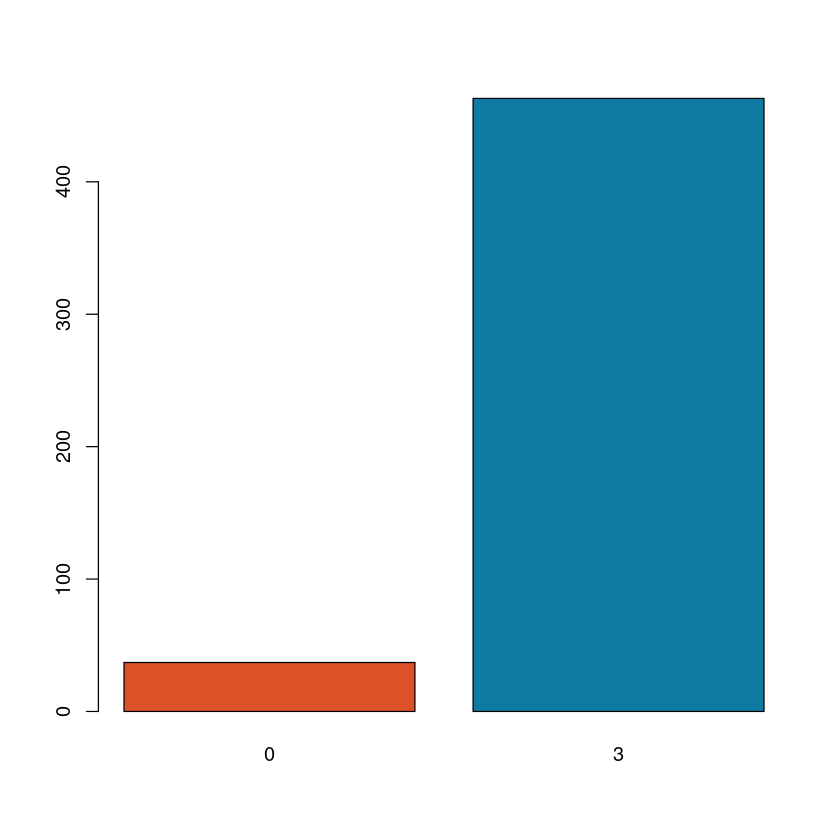

In [4]:
N <- 500
opciones <- c('dihybrid', 'simple.recessive', 'simple.dominant',
              'double.recessive', 'double.dominant', 'double.dominant.recessive')
Epistasia <- sample(opciones, 1)
cruce <- macho * hembra
Descendientes <- sample(phenotype(cruce, map = Epistasia), N, replace = TRUE)
table(Descendientes)
barplot(table(Descendientes), col = MetBrewer::met.brewer('Egypt', 4))

Propón una hipótesis del tipo de epistasia implicada y compruébala con un test de la $\chi^2$. En R puedes calcular el valor $p$ del estadístico $X$ sin tener que recurrir a una tabla de valores críticos. Por ejemplo, supón que has obtenido 472 descendientes de fenotipo 1 y 28 de fenotipo 2 en la F$_2$ de un cruce entre dos variedades diferentes de alguna planta. Sospechas que 472:28 se parece a una proporción 15:1, típica de una epistasia doble dominante. 

In [5]:
Observados <- c(28, 472)
Esperados  <- 500 * c(1/16, 15/16)
X <- sum(((Observados - Esperados) ^ 2) / Esperados)
X

[1] 0.3605333

Para saber si $X$ es significativamente mayor de lo esperado por casualidad, lo comparamos con la distribución $\chi^2_1$, con un solo grado de libertad. La función `pchisq()` nos da la respuesta:

In [6]:
pchisq(X, df = 1, lower.tail = FALSE)

[1] 0.5482102

Para estar más seguros, visualizamos el valor de nuestro estadístico en la distribución:

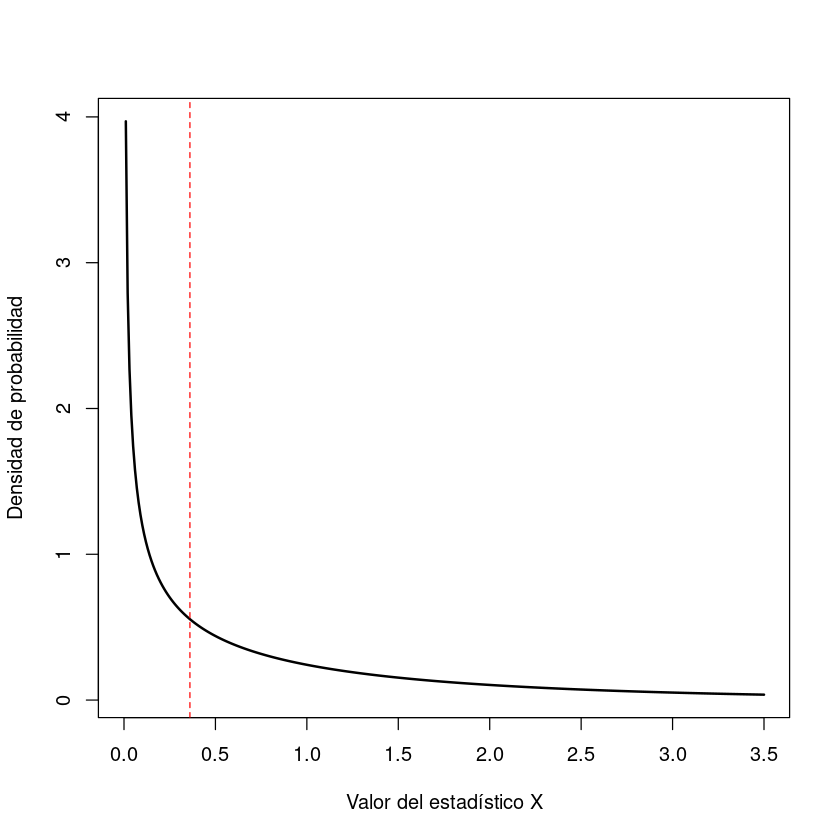

In [7]:
x <- seq(from = 0, to = 3.5, by = 0.01)
y <- dchisq(x, df = 1)
plot(x, y, type = 'l', lwd = 2, xlab = 'Valor del estadístico X', ylab = 'Densidad de probabilidad')
abline(v = X, lty = 2, col = 'red')